## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

## Exploratory data analysis

### Loading data

In [2]:
iris_ds = load_iris()
iris_df = pd.DataFrame(iris_ds.data, columns=iris_ds.feature_names)

### Stats

In [3]:
iris_df.shape

(150, 4)

In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


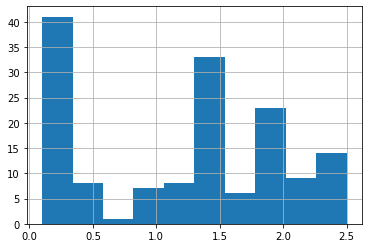

In [6]:
iris_df['petal width (cm)'].hist()

In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualizing data

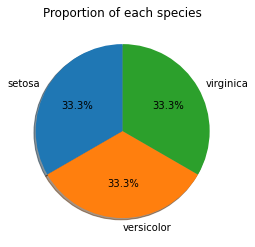

In [8]:
plt.title("Proportion of each species")
plt.pie(np.bincount(iris_ds.target), 
        labels=iris_ds.target_names, 
        autopct='%1.1f%%',
        shadow=True, startangle=90);

#### Features

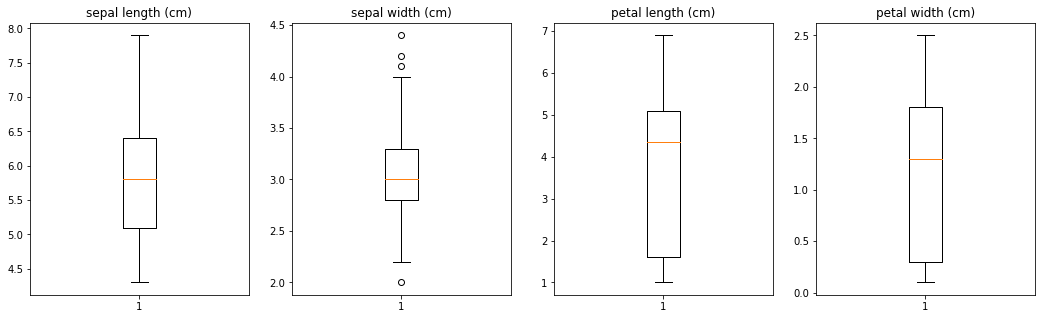

In [9]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4) 
fig.set_size_inches(18, 5)

ax1.boxplot(iris_df['sepal length (cm)']);
ax1.set_title('sepal length (cm)');

ax2.boxplot(iris_df['sepal width (cm)']);
ax2.set_title('sepal width (cm)');

ax3.boxplot(iris_df['petal length (cm)']);
ax3.set_title('petal length (cm)');

ax4.boxplot(iris_df['petal width (cm)']);
ax4.set_title('petal width (cm)');

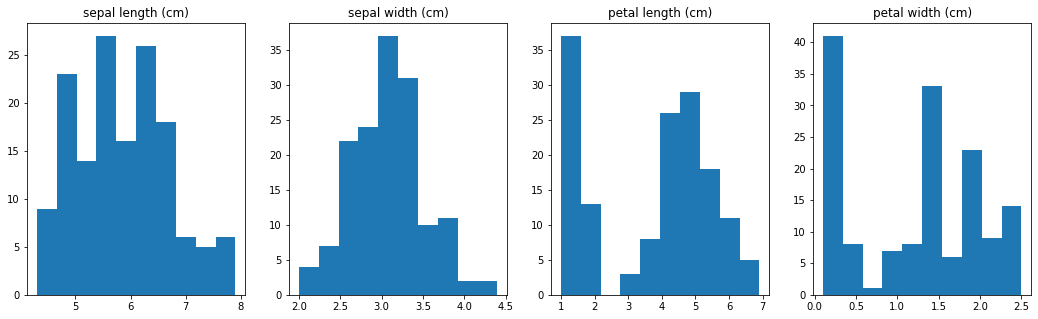

In [10]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4) 
fig.set_size_inches(18, 5)

ax1.hist(iris_df['sepal length (cm)']);
ax1.set_title('sepal length (cm)');

ax2.hist(iris_df['sepal width (cm)']);
ax2.set_title('sepal width (cm)');

ax3.hist(iris_df['petal length (cm)']);
ax3.set_title('petal length (cm)');

ax4.hist(iris_df['petal width (cm)']);
ax4.set_title('petal width (cm)');

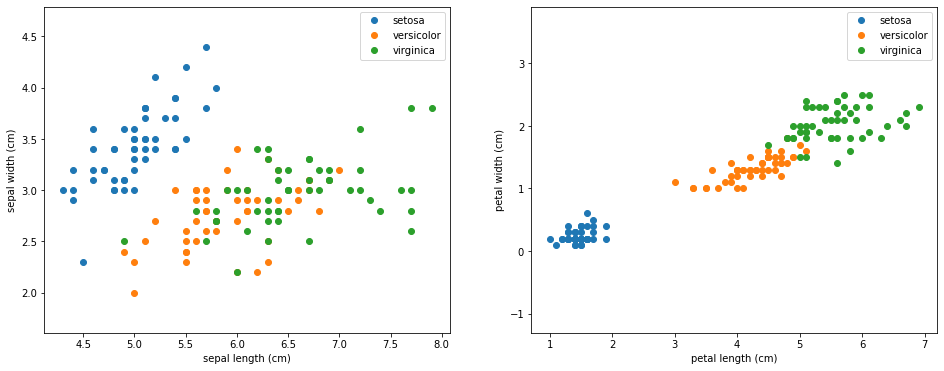

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(iris_ds.target_names):
    X_plot = iris_ds.data[iris_ds.target == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(iris_ds.feature_names[0])
plt.ylabel(iris_ds.feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(iris_ds.target_names):
    X_plot = iris_ds.data[iris_ds.target == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(iris_ds.feature_names[2])
plt.ylabel(iris_ds.feature_names[3])
plt.axis('equal')
plt.legend();

## Model creation

#### Test, train data split

In [12]:
#Parameters

train_size = 0.75                  #float or int, default=None
test_size= 1- train_size           #float or int, default=None
random_state=None                  #int or RandomState instance
shuffle=True                       #bool
stratify=None                      #array-like

#Splitting test and train data
X_train, X_test, y_train, y_test = train_test_split(iris_ds.data,
                                                    iris_ds.target,
                                                   train_size=train_size,
                                                   test_size=test_size,
                                                   random_state=random_state,
                                                   shuffle=shuffle,
                                                   stratify=stratify)

#### Model creation

In [13]:
#Parameters 

criterion='gini'                            # {“gini”, “entropy”},
splitter='best'                             # {“best”, “random”}
max_depth=None                              # int
min_samples_split =2                        # int or float
min_samples_leaf=1                          # int or float
min_weight_fraction_leaf=0.0                # float
max_features=None                           # int, float or {“auto”, “sqrt”, “log2”}
random_state=None                           # int, RandomState instance
max_leaf_nodes=None                         # int
min_impurity_decrease = 0.0                 # float
class_weight=None                           # dict, list of dict or “balanced”
ccp_alpha=0.0                               # non-negative float, default=0.0

#Creating model
classifier =  DecisionTreeClassifier(criterion=criterion,
                                     splitter=splitter,
                                    max_depth=max_depth,
                                     min_samples_split=min_samples_split,
                                    min_samples_leaf=min_samples_leaf,
                                    max_features = max_features,
                                    random_state = random_state,
                                    max_leaf_nodes = max_leaf_nodes,
                                    min_impurity_decrease  = min_impurity_decrease ,
                                    class_weight = class_weight,
                                    ccp_alpha = ccp_alpha)

#### Train

In [14]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

## Results

#### Prediction

In [15]:
y_pred = classifier.predict(X_test)

#### Accuracy 

In [16]:
classifier.score(X_test,y_test)

0.8947368421052632

#### Confusion matrix

In [17]:
#Parameters
labels=[0,1,2]                      #array-like of shape (n_classes)
sample_weight=None                  #array-like of shape (n_samples,)
normalize=None                      #{‘true’, ‘pred’, ‘all’}

confusion_matrix(y_pred,y_test,
                labels=labels,
                sample_weight=sample_weight,
                normalize=normalize)

array([[10,  0,  0],
       [ 0, 15,  3],
       [ 0,  1,  9]], dtype=int64)

#### Classification report

In [18]:
#Parameters
labels=[0,1,2]                        #[n_labels]
target_names= iris_ds.target_names    #list of strings
sample_weight=None                    #array-like of shape (n_samples,)
digits=2                              #int
output_dict= False                    #bool
zero_division="warn"                  #“warn”, 0 or 1

print(classification_report(y_pred,
                            y_test,
                            labels=labels,
                            target_names=target_names,
                            sample_weight=sample_weight,
                            digits=digits,
                            output_dict=output_dict,
                            zero_division=zero_division))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      0.83      0.88        18
   virginica       0.75      0.90      0.82        10

    accuracy                           0.89        38
   macro avg       0.90      0.91      0.90        38
weighted avg       0.90      0.89      0.90        38



### Visualizing decision tree

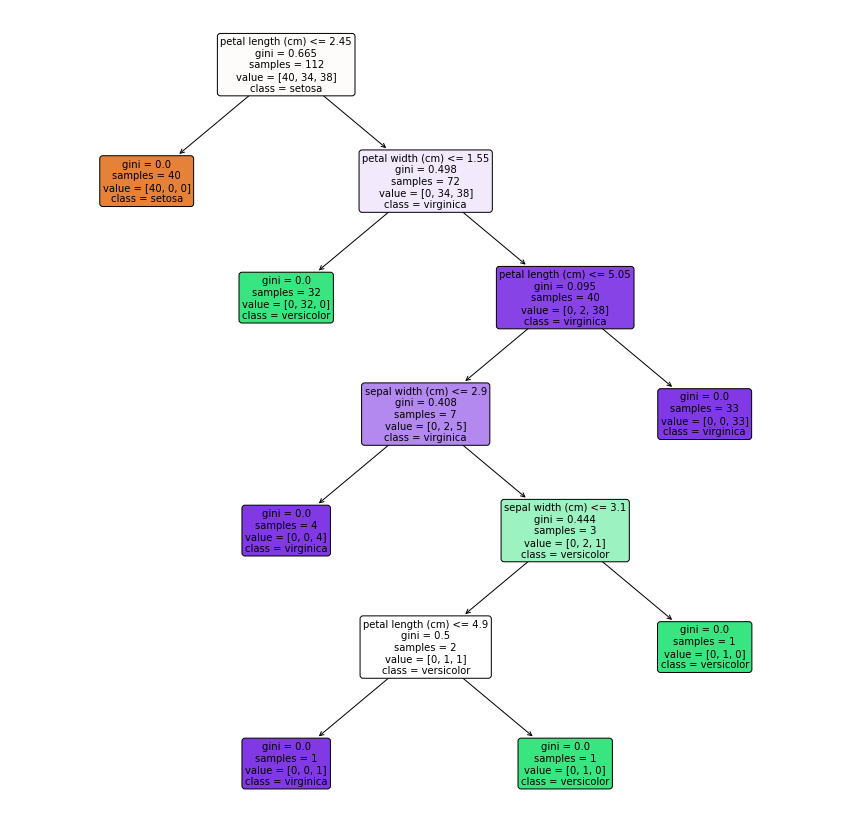

In [19]:
fig, ax = plt.subplots(figsize=(15, 15)) 

#Paramters
decision_tree=classifier             #decision tree regressor or classifier
filled = True                        #bool, optional (default=False)
feature_names=iris_ds.feature_names  #list of strings, optional (default=None)
class_names=iris_ds.target_names     #list of strings, bool or None, optional (default=None)
max_depth=None                       #int, optional (default=None)
fontsize=10                          #int, optional (default=None)
ax=ax                                #matplotlib axis, optional (default=None)
label='all'                          #{‘all’, ‘root’, ‘none’}, optional
impurity=True                        #bool, optional 
node_ids=False                       #bool, optional 
proportion=False                     #bool, optional
rounded=True                         #bool, optional (default=False)
precision=3                          #int, optional

plot_tree(decision_tree=decision_tree,
          filled=filled,
          feature_names=feature_names, 
          class_names=class_names,
          fontsize=fontsize,
          ax=ax,
          max_depth=max_depth,
          label=label,
          impurity=impurity,
          node_ids=node_ids,
          proportion=proportion,
          rounded=rounded,
          precision=precision);